<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/decision_tree/classification/01_Decition_Tree_Prepoda_Pospoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics, tree



# **Configuraciones**
---

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sns.set(style='darkgrid')

# **Funciones**
---

In [4]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)


def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)

def componentes_principales(data:object,
                            min_explained_variance:int=0.85,
                            min_component:int=3,
                            **kwards)->tuple:
  """simple method of PCA, that return data transform"""
  final_comp = 0
  for comp in range(min_component, data.shape[1]):
    pca = PCA(n_components=comp, **kwards)
    pca.fit(data)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() >= min_explained_variance:
      break

  final_pca = PCA(n_components=final_comp, **kwards)
  final_pca.fit(data)
  data_df = final_pca.transform(data)
  info = "Using {} components, we can explain {}% of the variability\
  in the original data.".format(final_comp,comp_check.sum())

  return data_df, final_pca, info

def matrix_confusion(
    y_true:pd.Series,
    y_pred:pd.Series,
    labels:list=None,
    title:str='confusion matrix', **kwards)->None:
  "confusion matrix"
  try:
    churm = metrics.confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    sns.heatmap(churm, annot=True,  ax=ax, fmt='g', **kwards)
    ax.set_title(title,size=20)
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ax.tick_params(labelsize = 12)
  except Exception as e:
    print(e)

# **Diccionario de datos**
---
- `Name`: nombre de la ventana de tiempo.
- `Netflows`: cantidad de netflows en la ventana de tiempo.
- `First_Protocol`: top 1 de protocolos usados en la ventana de tiempo.
- `Second_Protocol`: top 2 de protocolos usados en la ventana de tiempo.
- `Third_Protocol`: top 3 de protocolos usados en la ventana de tiempo.
- `p1_d`: 25% de los percentiles de todas las duraciones en la ventana de tiempo
- `p2_d`: 50% de los percentiles de todas las duraciones en la ventana de tiempo
- `p3_d`: 75% de los percentiles de todas las duraciones en la ventana de tiempo
- `duration`: duración total de la ventana de tiempo
- `max_d`: valor máximo de todas las duraciones en la ventana de tiempo.
- `min_d`: valor mínimo de todas las duraciones en la ventana de tiempo.
- `#packets`: número total de paquetes en la ventana de tiempo.
- `Avg_bps`: promedio de bits por segundo en la ventana de tiempo.
- `Avg_pps`: promedio de paquetes por segundo en la ventana de tiempo.
- `Avg_bpp`: promedio de bytes por paquete en la ventana de tiempo.
- `#Bytes`: número total de bytes en la ventana de tiempo.
- `#sp`: número total de puertos de origen usados en la ventana de tiempo.
- `#dp`: número total de puertos de destino usados en la ventana de tiempo.
- `first_sp`: top 1 de los puertos de origen en la ventana de tiempo.
- `second_sp`: top 2 de los puertos de origen en la ventana de tiempo.
- `third_sp`: top 3 de los puertos de origen en la ventana de tiempo.
- `first_dp`: top 1 de los puertos de destino en la ventana de tiempo.
- `second_dp`: top 2 de los puertos de destino en la ventana de tiempo.
- `third_dp`: top 3 de los puertos de destino en la ventana de tiempo.
- `p1_ip`: 25% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p2_ip`: 50% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p3_ip`: 75% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p1_ib`: 25% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p2_ib`: 50% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p3_ib`: 75% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `Type`: tipo de ventana de tiempo
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5


source: This data is collected in my research of degree

# **Data**
---

In [5]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv'
data = pd.read_csv(url, dtype=str).drop('Unnamed: 0', axis=1)

In [6]:
pd.DataFrame

pandas.core.frame.DataFrame

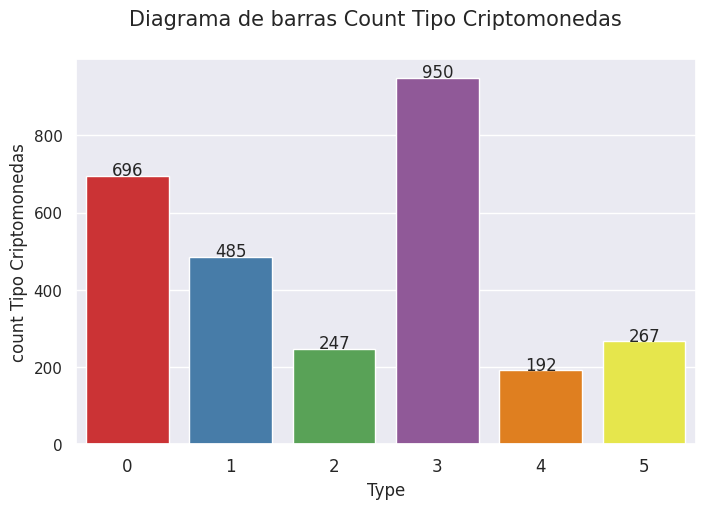

In [7]:
plot_bar(
    data,
    paleta=None,
    ejeX='Type',
    ejey='count Tipo Criptomonedas',
    title='Count Tipo Criptomonedas')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             2837 non-null   object
 1   Netflows         2837 non-null   object
 2   First_Protocol   2837 non-null   object
 3   Second_Protocol  619 non-null    object
 4   Third_Protocol   26 non-null     object
 5   p1_d             2837 non-null   object
 6   p2_d             2837 non-null   object
 7   p3_d             2837 non-null   object
 8   duration         2837 non-null   object
 9   max_d            2837 non-null   object
 10  min_d            2837 non-null   object
 11  #packets         2837 non-null   object
 12  Avg_bps          2837 non-null   object
 13  Avg_pps          2837 non-null   object
 14  Avg_bpp          2837 non-null   object
 15  #Bytes           2837 non-null   object
 16  #sp              2837 non-null   object
 17  #dp              2837 non-null   

In [9]:
data.iloc[:, 12:]

,Avg_bps,Avg_pps,Avg_bpp,#Bytes,#sp,#dp,first_sp,second_sp,third_sp,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,125708,18,833,4621561,33,37,443,80.0,123.0,443,80.0,123.0,3.0,7.0,22.0,127.0,255.0,1888.0,0
1,148,0,49,983,13,8,53,53195.0,48984.0,443,53.0,53195.0,1.0,1.0,1.0,37.0,47.0,64.0,0
2,236,0,87,874,6,6,53,39308.0,54454.0,53,39308.0,54454.0,1.0,1.0,1.0,34.0,43.0,61.75,0
3,129626,29,556,4847263,167,120,53,443.0,54059.0,53,5355.0,443.0,1.0,1.0,1.0,39.0,49.0,54.0,0
4,328000,1000,41,82,2,2,48871,53.0,NaN,48871,53.0,NaN,1.0,1.0,1.0,37.0,41.0,45.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,1179,0,424,1273,2,2,3333,52003.0,NaN,3333,52003.0,NaN,1.25,1.5,1.75,328.25,636.5,944.75,5
2833,507,0,336,37065,2,2,3333,52003.0,NaN,3333,52003.0,NaN,53.5,55.0,56.5,10108.75,18532.5,26956.25,5
2834,397,0,318,14330,2,2,3333,52003.0,NaN,3333,52003.0,NaN,22.25,22.5,22.75,3865.0,7165.0,10465.0,5
2835,470,0,329,16800,2,2,3333,52003.0,NaN,3333,52003.0,NaN,24.75,25.5,26.25,4627.5,8400.0,12172.5,5


# **Structured**
---

In [10]:
data[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']] = data[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']].astype('float64')

In [11]:
data[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']] = data[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']].astype('int64')

# **Data Split**
---

Si bien se puede usar las variables categoricas, por fines del ejercicio se usaran las variables cuantitativas.

In [12]:
X = data.select_dtypes(include=['float64', 'int64'])
y = data.iloc[:,-1]

**Select the best features**


Se cambiara solo el criterio de impureza, en proximos ejercicios se implementaran otros hiperparametros. Se usa un ensamblador para encontrar las mejores caracteristicas.

In [13]:
model_best_feature_gini = ExtraTreesClassifier(
    n_estimators=100, criterion='gini'
)

In [14]:
model_best_feature_gini

ExtraTreesClassifier()

In [15]:
data_best_gini = model_best_feature_gini.fit(X, y)

Seleccionamos las mejores caracteristicas, para implementar un metodo para la reducción de overfitting.

In [16]:
model = SelectFromModel(data_best_gini, prefit=True)
model

SelectFromModel(estimator=ExtraTreesClassifier(), prefit=True)

In [17]:
best_features = X[X.columns[model.get_support(indices=True)]].columns
best_features

Index(['p1_d', 'p2_d', 'min_d', 'Avg_bpp', 'p2_ip', 'p3_ip', 'p2_ib'], dtype='object')

No se implementará un proceso de estandarización, ya que el modelo es robusto ante ese tipo de casos.

In [18]:
X = X[best_features]
X

,p1_d,p2_d,min_d,Avg_bpp,p2_ip,p3_ip,p2_ib
0,18.93900,168.1730,0.000,833.0,7.0,22.00,255.0
1,0.00000,0.0000,0.000,49.0,1.0,1.00,47.0
2,0.00000,0.0000,0.000,87.0,1.0,1.00,43.0
3,0.00000,0.0000,0.000,556.0,1.0,1.00,49.0
4,0.00000,0.0000,0.000,41.0,1.0,1.00,41.0
...,...,...,...,...,...,...,...
2832,2.15850,4.3170,0.000,424.0,1.5,1.75,636.5
2833,583.36850,583.8100,582.927,336.0,55.0,56.50,18532.5
2834,288.55375,288.5545,288.553,318.0,22.5,22.75,7165.0
2835,285.37900,285.3790,285.379,329.0,25.5,26.25,8400.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.8,
    random_state=12354,
    shuffle=True,
    stratify=y
)

# **Prepoda**
---

In [20]:
model = DecisionTreeClassifier(random_state=12354)

In [21]:
score_recall = metrics.make_scorer(
    metrics.recall_score,
    labels = [1,2,3,4,5],
    average = 'micro'
)

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    "max_depth": list(range(2, 20)),
    'min_samples_split': list(range(2, 10)),
}


grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    refit=True,
    return_train_score=True,
    scoring = score_recall,
    cv=10
)

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=12354),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True,
             scoring=make_scorer(recall_score, labels=[1, 2, 3, 4, 5], average=micro))

In [25]:
print('Mejor: %f usando %s' % (grid.best_score_, grid.best_params_))

Mejor: 0.924653 usando {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 7}


In [26]:
model_final = grid.best_estimator_
model_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 12354,
 'splitter': 'best'}

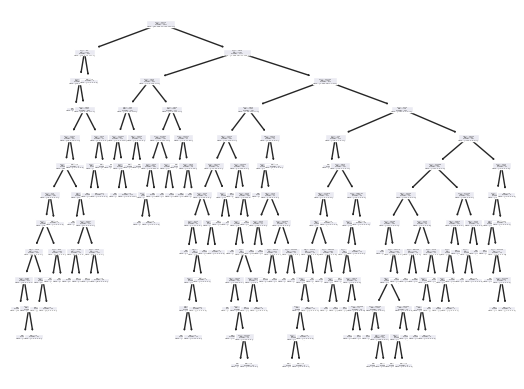

In [27]:
tree.plot_tree(model_final)
plt.show()

In [29]:
with open("./data/miner.dot", "w") as dotfile:
  tree.export_graphviz(model_final, out_file=dotfile, feature_names=X.columns)
  dotfile.close()

In [30]:
!pip install graphviz

In [31]:
import os
from graphviz import Source

In [32]:
file_dot = open("./data/miner.dot", "r")
text = file_dot.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="p2_ib <= 367.75\\ngini = 0.777\\nsamples = 2269\\nvalue = [557, 388, 197, 760, 154, 213]"] ;\n1 [label="p2_ip <= 8.5\\ngini = 0.104\\nsamples = 553\\nvalue = [523, 0, 15, 13, 1, 1]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Avg_bpp <= 15.5\\ngini = 0.098\\nsamples = 551\\nvalue = [523, 0, 13, 13, 1, 1]"] ;\n1 -> 2 ;\n3 [label="gini = 0.444\\nsamples = 3\\nvalue = [1, 0, 0, 2, 0, 0]"] ;\n2 -> 3 ;\n4 [label="p2_ib <= 268.5\\ngini = 0.092\\nsamples = 548\\nvalue = [522, 0, 13, 11, 1, 1]"] ;\n2 -> 4 ;\n5 [label="min_d <= 11.511\\ngini = 0.065\\nsamples = 507\\nvalue = [490, 0, 10, 6, 1, 0]"] ;\n4 -> 5 ;\n6 [label="p2_ib <= 145.5\\ngini = 0.062\\nsamples = 505\\nvalue = [489, 0, 9, 6, 1, 0]"] ;\n5 -> 6 ;\n7 [label="p2_ip <= 4.25\\ngini = 0.031\\nsamples = 384\\nvalue = [378, 0, 5, 0, 1, 0]"] ;\n6 -> 7 ;\n8 [label="p2_d <= 60.226\\ngini = 0.026\\nsamples = 38

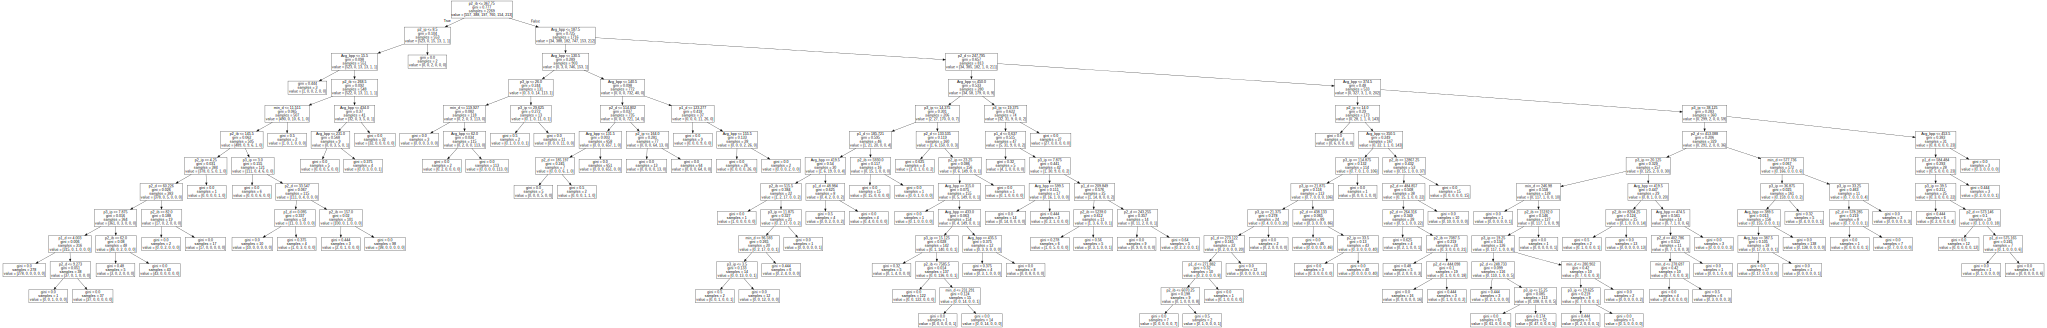

In [33]:
Source(text)

In [34]:
y_predict = model_final.predict(X_test)

The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (2).


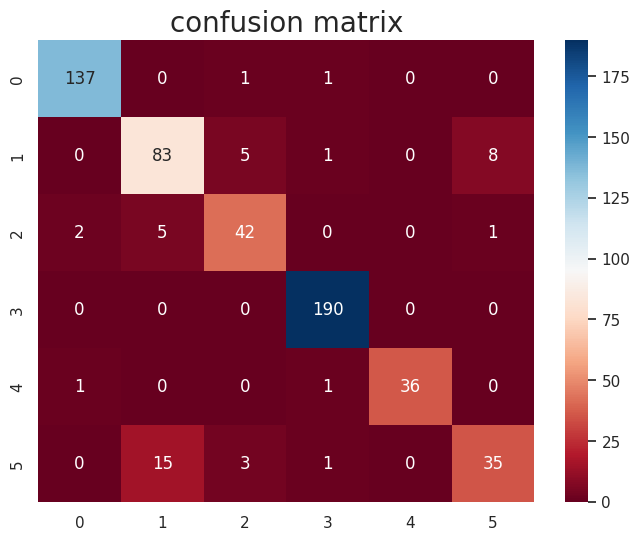

In [35]:
kward={"cmap":"RdBu",  "annot_kws":{'size': 12}}
matrix_confusion(y_test, y_predict, title='confusion matrix', **kward)

In [36]:
recall_sc = metrics.recall_score(
    y_test,
    y_predict,
    average='micro',
    labels=[1,2,3,4,5])
recall_sc

0.8997668997668997

- El modelo tiene un buen rendimiento para distinguir trafico de red entre registros mineros y benignos, aunque parece haber un pequeño sobreajuste

# **Pospoda**
---
**Cost Complexity Pruning**
La poda de complejidad de costos se trata de encontrar el parámetro correcto para alfa.

In [37]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12345)

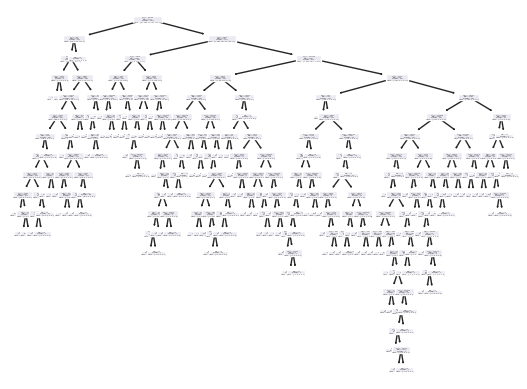

In [38]:
tree.plot_tree(model)
plt.show()

In [39]:
path = model.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00029337, 0.00029382, 0.00038563, 0.00039175,
        0.00040924, 0.00040956, 0.00041134, 0.00041428, 0.0004148 ,
        0.00041753, 0.00041753, 0.00043525, 0.00043607, 0.00043636,
        0.00043933, 0.00044072, 0.00044072, 0.00044072, 0.00044072,
        0.00044072, 0.00049291, 0.00051418, 0.00052887, 0.0005813 ,
        0.00058763, 0.00058763, 0.00058763, 0.00058763, 0.00063304,
        0.00065994, 0.00066108, 0.00066108, 0.00066108, 0.00066108,
        0.00070516, 0.00072691, 0.00073251, 0.00073454, 0.00077126,
        0.00077679, 0.0007933 , 0.00080799, 0.00082636, 0.00086357,
        0.00086782, 0.00088045, 0.00088145, 0.00089719, 0.00093467,
        0.00097875, 0.0009963 , 0.00100164, 0.0010829 , 0.00111876,
        0.00126608, 0.00129596, 0.00138333, 0.00142869, 0.0015915 ,
        0.00161158, 0.00163697, 0.00173223, 0.0018021 , 0.00185096,
        0.00198901, 0.00247613, 0.00253307, 0.00379622, 0.00408675,
        0.0050346 , 0.00517637, 0.

In [40]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [41]:
ccp_alphas[:-1]

array([0.        , 0.00029337, 0.00029382, 0.00038563, 0.00039175,
       0.00040924, 0.00040956, 0.00041134, 0.00041428, 0.0004148 ,
       0.00041753, 0.00041753, 0.00043525, 0.00043607, 0.00043636,
       0.00043933, 0.00044072, 0.00044072, 0.00044072, 0.00044072,
       0.00044072, 0.00049291, 0.00051418, 0.00052887, 0.0005813 ,
       0.00058763, 0.00058763, 0.00058763, 0.00058763, 0.00063304,
       0.00065994, 0.00066108, 0.00066108, 0.00066108, 0.00066108,
       0.00070516, 0.00072691, 0.00073251, 0.00073454, 0.00077126,
       0.00077679, 0.0007933 , 0.00080799, 0.00082636, 0.00086357,
       0.00086782, 0.00088045, 0.00088145, 0.00089719, 0.00093467,
       0.00097875, 0.0009963 , 0.00100164, 0.0010829 , 0.00111876,
       0.00126608, 0.00129596, 0.00138333, 0.00142869, 0.0015915 ,
       0.00161158, 0.00163697, 0.00173223, 0.0018021 , 0.00185096,
       0.00198901, 0.00247613, 0.00253307, 0.00379622, 0.00408675,
       0.0050346 , 0.00517637, 0.00561254, 0.0068212 , 0.00825

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

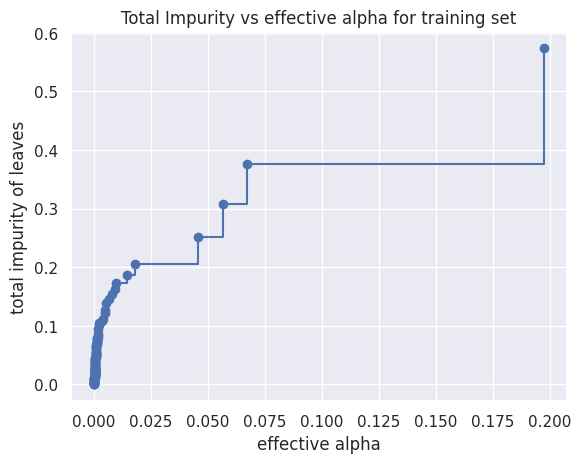

In [42]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [43]:
impurities

array([0.        , 0.00088011, 0.00146774, 0.002239  , 0.00302251,
       0.00384099, 0.00466011, 0.0054828 , 0.00796847, 0.00879807,
       0.00963312, 0.01046818, 0.01220917, 0.01395344, 0.01482616,
       0.01570481, 0.01702698, 0.0174677 , 0.01790843, 0.01834915,
       0.01878987, 0.02026861, 0.02078279, 0.02131166, 0.02305554,
       0.02364317, 0.0242308 , 0.02481843, 0.02540606, 0.0260391 ,
       0.02801891, 0.02868   , 0.02934108, 0.03000216, 0.03066325,
       0.0313684 , 0.03427603, 0.03647357, 0.03720811, 0.03797937,
       0.04108651, 0.04187982, 0.0434958 , 0.04432215, 0.0460493 ,
       0.04691713, 0.05043893, 0.05132038, 0.05221756, 0.0540869 ,
       0.05506565, 0.05606195, 0.06107017, 0.06323596, 0.06435472,
       0.06688687, 0.0694788 , 0.07086213, 0.07229083, 0.07388232,
       0.07549391, 0.07713088, 0.07886311, 0.08066521, 0.08621809,
       0.09417411, 0.10160249, 0.10413556, 0.10793178, 0.11201852,
       0.12208773, 0.1272641 , 0.13848918, 0.14531037, 0.15356

In [44]:
ccp_alphas

array([0.        , 0.00029337, 0.00029382, 0.00038563, 0.00039175,
       0.00040924, 0.00040956, 0.00041134, 0.00041428, 0.0004148 ,
       0.00041753, 0.00041753, 0.00043525, 0.00043607, 0.00043636,
       0.00043933, 0.00044072, 0.00044072, 0.00044072, 0.00044072,
       0.00044072, 0.00049291, 0.00051418, 0.00052887, 0.0005813 ,
       0.00058763, 0.00058763, 0.00058763, 0.00058763, 0.00063304,
       0.00065994, 0.00066108, 0.00066108, 0.00066108, 0.00066108,
       0.00070516, 0.00072691, 0.00073251, 0.00073454, 0.00077126,
       0.00077679, 0.0007933 , 0.00080799, 0.00082636, 0.00086357,
       0.00086782, 0.00088045, 0.00088145, 0.00089719, 0.00093467,
       0.00097875, 0.0009963 , 0.00100164, 0.0010829 , 0.00111876,
       0.00126608, 0.00129596, 0.00138333, 0.00142869, 0.0015915 ,
       0.00161158, 0.00163697, 0.00173223, 0.0018021 , 0.00185096,
       0.00198901, 0.00247613, 0.00253307, 0.00379622, 0.00408675,
       0.0050346 , 0.00517637, 0.00561254, 0.0068212 , 0.00825

In [45]:
clfs = []
for ccp_alpha in ccp_alphas:
   clf = DecisionTreeClassifier(random_state=12354, ccp_alpha=ccp_alpha)
   clf.fit(X_train, y_train)
   clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

print(clfs)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2039964280379657
[DecisionTreeClassifier(random_state=12354), DecisionTreeClassifier(ccp_alpha=0.00029336866260058173, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.00029381519024533566, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.0003856324371970031, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.0003917535869937809, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.00040924258641314627, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.00040956056822077106, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.0004113412663434701, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.0004142794182459234, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.000414797915640474, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.0004175268492960036, random_state=12354), DecisionTreeClassifier(ccp_alpha=0.0004175268492960036, random_state=12354), DecisionTreeClassifier(ccp_alph

In [46]:
model.tree_.node_count

291

Se ignora el ultimo alfa, ya que nos deja seguro la raiz del arbol, pues la penalización es agresiva.

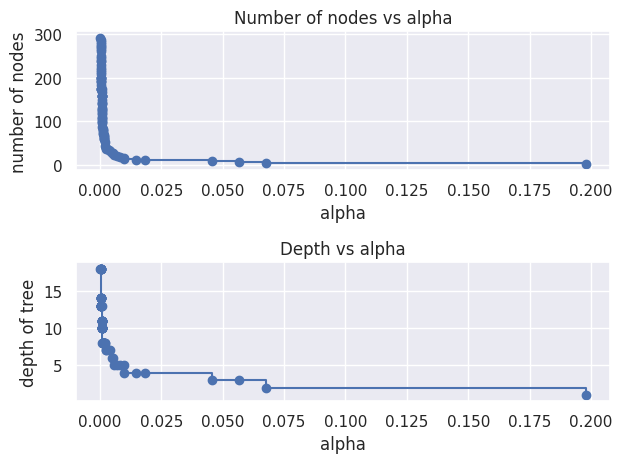

In [47]:
clfss = clfs[:-1]
ccp_alphass = ccp_alphas[:-1]
# An array with contain of number nodes of each tree
node_counts = [clf.tree_.node_count for clf in clfss]
# An array with contain of the deep each tree
depth = [clf.tree_.max_depth for clf in clfss]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphass, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphass, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

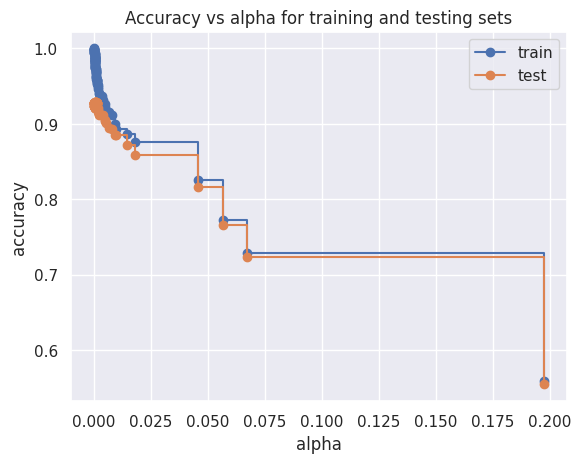

In [48]:
train_scores = [clf.score(X_train, y_train) for clf in clfs[:-1]]
test_scores = [clf.score(X_test, y_test) for clf in clfs[:-1]]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- Seleccionamos el alpha 0.04564608 que permite el maximo score de prueba. Aunque la validación no supero el train.




In [ ]:
ccp_alphas[:-1]

In [50]:
ccp_alphas

array([0.        , 0.00029337, 0.00029382, 0.00038563, 0.00039175,
       0.00040924, 0.00040956, 0.00041134, 0.00041428, 0.0004148 ,
       0.00041753, 0.00041753, 0.00043525, 0.00043607, 0.00043636,
       0.00043933, 0.00044072, 0.00044072, 0.00044072, 0.00044072,
       0.00044072, 0.00049291, 0.00051418, 0.00052887, 0.0005813 ,
       0.00058763, 0.00058763, 0.00058763, 0.00058763, 0.00063304,
       0.00065994, 0.00066108, 0.00066108, 0.00066108, 0.00066108,
       0.00070516, 0.00072691, 0.00073251, 0.00073454, 0.00077126,
       0.00077679, 0.0007933 , 0.00080799, 0.00082636, 0.00086357,
       0.00086782, 0.00088045, 0.00088145, 0.00089719, 0.00093467,
       0.00097875, 0.0009963 , 0.00100164, 0.0010829 , 0.00111876,
       0.00126608, 0.00129596, 0.00138333, 0.00142869, 0.0015915 ,
       0.00161158, 0.00163697, 0.00173223, 0.0018021 , 0.00185096,
       0.00198901, 0.00247613, 0.00253307, 0.00379622, 0.00408675,
       0.0050346 , 0.00517637, 0.00561254, 0.0068212 , 0.00825

In [57]:
model = DecisionTreeClassifier(random_state=12354, ccp_alpha=0.04564608)
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [58]:
metrics.recall_score(
    y_test,
    y_predict_test,
    average='micro',
    labels=[1,2,3,4,5])

0.8391608391608392

The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (2).


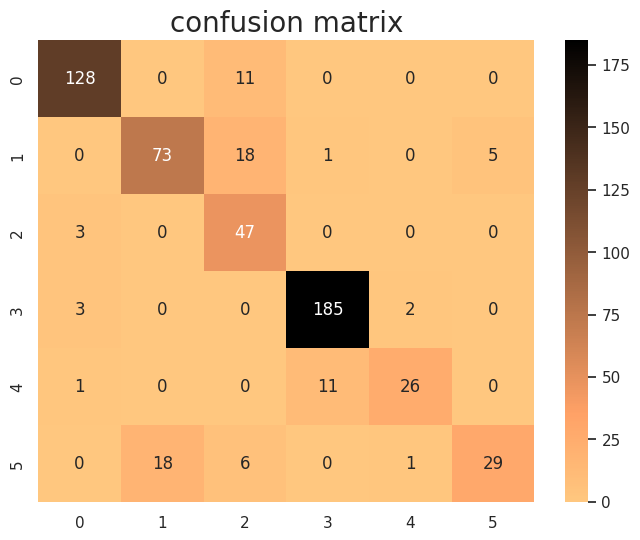

In [59]:
kward={"cmap":plt.cm.copper_r,  "annot_kws":{'size': 12}}
matrix_confusion(y_test, y_predict_test, title='confusion matrix', **kward)

- Se debe recordar que el modelo se entrenó con un conjunto de datos pequeño, con técnicas de reducción de dimensionalidad, entre otros factores, permitieron que el modelo aprendiera de manera eficiente, y los efectos de la pos poda costo mínimo de complejidad, no se aprecie de manera significativa.